# Metody Obliczeniowe w Nauce i Technice
## Laboratorium 6
### Rozwiązywanie układów równań liniowych
#### Mateusz Surajk

In [34]:
import time
from copy import copy
from numpy import array, zeros, float, dot
from random import randint
import math
import numpy as np
import scipy
import sys
from scipy import linalg
import networkx as nx
import matplotlib.pyplot as plt

## Zadanie 1 Metoda Gaussa-Jordana

Napisz i sprawdź funkcję rozwiązującą układ równań liniowych n × n metodą GaussaJordana. Dla rozmiarów macierzy współczynników większych niż 500 × 500 porównaj
czasy działania zaimplementowanej funkcji z czasami uzyskanymi dla wybranych funkcji
bibliotecznych.

**Metoda Gaussa-Jordana** jest jedną z metod rozwiązywania układów równań przy pomocy operacji elementarnych na macierzach.

W metodzie tej sprowadzamy macierz rozszerzoną układu równań do postaci bazowej (macierzy jednostkowej). Z tej postaci odczytujemy wprost rozwiązania układu równań.

Poniżej przedstawiam implementację metody Gaussaa-Jordana z pivotingiem.

In [35]:
def gauss_jordan(A, b):
    n, m = A.shape

    C = zeros((n, m+1), float)
    C[:, 0:n], C[:, n] = A, b

    for j in range(n):
        p = j

        for i in range(j+1, n):
            if abs(C[i, j]) > abs(C[p, j]):
                p = i
        if abs(C[p, j]) < 1.0e-16:
            print("matrix is (likely) singular")
            return b
        # swap rows
        C[p, :], C[j, :] = copy(C[j, :]), copy(C[p, :])

        pivot = C[j, j]
        
        C[j, :] = C[j, :] / pivot
        
        for i in range(n):
            if i == j:
                continue
            C[i, :] = C[i, :] - C[i, j]*C[j, :]
            
    I, x = C[:, 0:n], C[:, n]
    return x

W celu porównania wyników otrzymanych z powyższej funkcji z wynikami z funkcji bibliotecznych użyję poniższej funkcji.
Błąd wyniku dopuszcam na poziomie $10^{-7}$

In [225]:
def compare_results(L,LL):
    eps = 10**(-7)
    flag = True
    for i in range(len(L)):
        if abs(L[i] - LL[i]) > eps:
            print(L[i],LL[i])
            flag = False
            break;
        if not flag:
            break

    if flag:
        print("Success!")
    else:
        print("Failed!")

In [226]:
def print_times(n, print_results=True):

    A = np.random.randint(0, 10, (n, n))
    R = np.random.randint(0, 50, n)
    for i in range(n):
        A[i][i] = randint(1, 3)

    start = time.time()
    M = gauss_jordan(A, R)
    end = time.time()

    start_numpy = time.time()
    M2 = np.linalg.solve(A, R)
    end_numpy = time.time()
    compare_results(M,M2)
    lst_time = time.time()
    M3 = np.linalg.lstsq(A, R, rcond=None)
    lst_end_time = time.time()

    scipy_start = time.time()
    linalg.solve(A, R)
    scipt_end = time.time()
    if print_results:
        print(f"My own algorithm: {(end-start)*1000} ms")
        print(f"Numpy linalg.solve: {(end_numpy-start_numpy)*1000} ms")
        print(f"Numpy linalg lstsq: {(lst_end_time-lst_time)*1000} ms")
        print(f"Scipy linalg.solve: {(scipt_end-scipy_start)*1000} ms")
    return ((end-start)*1000,(end_numpy-start_numpy)*1000,(lst_end_time-lst_time)*1000,(scipt_end-scipy_start)*1000)

In [227]:
def show_results(n):
    A = np.random.randint(0, 10, (n, n))
    R = np.random.randint(0, 50, n)
    for i in range(n):
        A[i][i] = randint(1, 3)
    X = gauss_jordan(A,R)
    print("My algorithm",X)
    print("Numpy",np.linalg.solve(A,R))

Poniżej prezentuję wyniki dla mojej implementacji oraz implementacji z biblioteki numpy.

In [228]:
show_results(15)

My algorithm [ 0.47966561 -4.18926686 -6.04349697  8.42052768  1.262362    5.39594966
  1.04007316  7.45211019 -5.56835894  1.01973053 -3.48777263 -4.69340727
  5.61360063 -2.40005169 -1.95754015]
Numpy [ 0.47966561 -4.18926686 -6.04349697  8.42052768  1.262362    5.39594966
  1.04007316  7.45211019 -5.56835894  1.01973053 -3.48777263 -4.69340727
  5.61360063 -2.40005169 -1.95754015]


Następnie zobrazujuję ile czasu zajmuje obliczenie wyniku przez własną implementację a ile przez funkcje biblioteczne.
Do funkcji **print_results()** przekazuje dla jakiego rozmiaru macierzy przetestować funkcje. 

In [229]:
print_times(100)

Success!
My own algorithm: 45.02367973327637 ms
Numpy linalg.solve: 1.0008811950683594 ms
Numpy linalg lstsq: 0.9982585906982422 ms
Scipy linalg.solve: 0.0 ms


(45.02367973327637, 1.0008811950683594, 0.9982585906982422, 0.0)

In [230]:
print_times(500)

Success!
My own algorithm: 887.0372772216797 ms
Numpy linalg.solve: 2.9630661010742188 ms
Numpy linalg lstsq: 25.001049041748047 ms
Scipy linalg.solve: 4.000425338745117 ms


(887.0372772216797, 2.9630661010742188, 25.001049041748047, 4.000425338745117)

In [231]:
print_times(1000)

Success!
My own algorithm: 4346.00305557251 ms
Numpy linalg.solve: 15.965938568115234 ms
Numpy linalg lstsq: 120.99981307983398 ms
Scipy linalg.solve: 18.005847930908203 ms


(4346.00305557251, 15.965938568115234, 120.99981307983398, 18.005847930908203)

Poniższa funkcja służy do zobrazowania czasu działania mojej funkcji Gaussa-Jordana oraz funkcji bibliotecznych na wykresie. 

In [245]:
def show_plot():
    m = []
    s = []
    l = []
    sc = []
    r = []
    for n in range(0, 501,100):
        (my,sol,lst,sci) = print_times(n,print_results=False) 
        r.append(n)
        m.append(my)
        s.append(sol)
        l.append(lst)
        sc.append(sci)
    fig = plt.figure()
    ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax1.set_xlabel('N')
    ax1.set_ylabel('milliseconds')
    plt.plot(r,m,label="Moja implementacja")
    plt.plot(r,s,label="np.linalg.solve")
    plt.plot(r,l,label="np.linalg.lstql")
    plt.plot(r,sc,label="scipy.linalg.solve")
    plt.legend(loc="upper left")
    plt.draw()
    

Success!
Success!
Success!
Success!
Success!
Success!


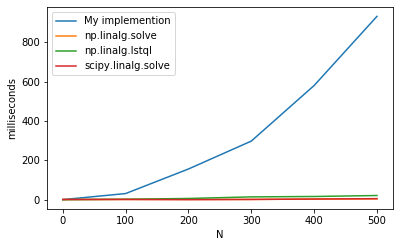

In [233]:
show_plot()

## Wnioski:
- Dla niedużych rozmiarów macierzy funkcja zaimplementowana przeze mnie daje dobre wyniki czasowe, lecz ze wzrostem rozmiaru macierzy biblioteki takie jak numpy oraz scipy są drastycznie szybsze. Wynika to zapewne z faktu że implementacja w tych bibliotekach jest lepiej zoptymalizowana oraz że nadmienione biblioteki są zaimplementowane w C. Przypuszczam że powyższy algorytm napisany w C/C++ dałby dużo lepszy czas (nawet może zbliżony do biblioteki numpy/scipy).
- Niemniej jednak zaimplementowana przeze mnie funkcja zwraca poprawne wyniki.
- Biblioteki takie jak numpy/scipy nie bez powodu są wykorzystywane w Big Data Analysys gdyż działają bardzo szybko oraz mają bardzo dużo przydatnych matematycznych funkcji.

## Zadanie 2 Faktoryzacja LU
Napisz i sprawdź funkcję dokonującą faktoryzacji A = LU macierzy A. Zastosuj częściowe poszukiwanie elementu wiodącego oraz skalowanie.

Rozkład LU to rozkład pewnej macierzy A na macierz dolnotrójkątną L oraz górnotrójkątną U tak, że A = LU. 

Poniżej przedstawiam implementacje faktoryzacji LU

In [155]:
def LU_partial_decomposition(matrix):
    n, m = matrix.shape
    P = np.identity(n)
    L = np.identity(n)
    U = matrix.copy()
    PF = np.identity(n)
    LF = np.zeros((n, n))
    for k in range(0, n - 1):
        index = np.argmax(abs(U[k:, k]))
        index = index + k
        if index != k:
            P = np.identity(n)
            P[[index, k], k:n] = P[[k, index], k:n]
            U[[index, k], k:n] = U[[k, index], k:n]
            PF = np.dot(P, PF)
            LF = np.dot(P, LF)
        L = np.identity(n)
        for j in range(k+1, n):
            L[j, k] = -(U[j, k] / U[k, k])
            LF[j, k] = (U[j, k] / U[k, k])
        U = np.dot(L, U)
    np.fill_diagonal(LF, 1)
    return PF, LF, U

Poniżej znajduja się funkcje które przytotowywują macierz do faktoryzacji oraz sprawdzają poprawnośc wyników porównując wyniki otrzymane powyższą metodą z wynikami z funkcji biblioteki scipy.

In [234]:
def prepare_tables(n):
    A = np.random.randint(0, 10, (n, n))
    R = np.random.randint(0, 50, n)
    for i in range(n):
        A[i][i] = randint(1, 3)
    return (A,R)

In [235]:
def compare_results_for_LU(L,LL):
    eps = 10**(-7)
    flag = True
    for i in range(len(L)):
        for j in range(len(L[i])):
            if abs(L[i,j] - LL[i,j]) > eps:
                print(L[i,j],LL[i,j])
                flag = False
                break;
            if not flag:
                break

    if flag:
        print("Success!")
    else:
        print("Failed!")

Poniżej prezentuję macierze L oraz U w celu zobrazowania wyników, oraz badam czy są napewno poprawne.

In [242]:
(X,Y) = prepare_tables(5)
PF,L, U = LU_partial_decomposition(X)
print(L)
print(U)
P,LL,UU = linalg.lu(X)
compare_results_for_LU(L,LL)
compare_results_for_LU(U,UU)

[[ 1.          0.          0.          0.          0.        ]
 [ 0.4         1.          0.          0.          0.        ]
 [ 0.4         0.52380952  1.          0.          0.        ]
 [ 1.         -0.23809524  0.08        1.          0.        ]
 [ 0.6         0.19047619  0.44        0.15909091  1.        ]]
[[ 5.          2.          2.          9.          0.        ]
 [ 0.          4.2         7.2        -3.6         3.        ]
 [ 0.          0.         -3.57142857 -0.71428571  5.42857143]
 [ 0.          0.          0.         -8.8         3.28      ]
 [ 0.          0.          0.          0.          3.51818182]]
Success!
Success!


In [237]:
(X,Y) = prepare_tables(100)
PF,L, U = LU_partial_decomposition(X)
P,LL,UU = linalg.lu(X)
compare_results_for_LU(L,LL)
compare_results_for_LU(U,UU)

Success!
Success!


In [238]:
(X,Y) = prepare_tables(300)
PF,L, U = LU_partial_decomposition(X)
P,LL,UU = linalg.lu(X)
compare_results_for_LU(L,LL)
compare_results_for_LU(U,UU)

Success!
Success!


## Wnioski:
- Otrzymane przeze mnie wyniki są zgodne z wynikami bibliotecznymi. Dla większych rozmiarów macierzy (od 500 w górę) epsilon przyjęty przeze mnie jest zbyt mały i powstają błędy np rzędu $10^{-5}$. Lecz są to dalej tak małe liczby że myślę iż funkcja działa poprawnie.

## Zadanie 3 Analiza obwodu elektrycznego

Napisz program, który:
- a) Wczytuje z pliku listę krawędzi grafu opisującego obwód elektryczny. Wagi krawędzi określają opór fragmentu obwodu między dwoma węzłami. Wierzchołki grafu
identyfikowane są przez liczby naturalne.

- b) Wczytuje dodatkowo trójkę liczb (s, t, E), przy czym para (s, t) wskazuje między którymi węzłami sieci przyłożono siłę elektromotoryczną E. Opór wewnętrzny
SEM można zaniedbać.

- c) Wykorzystując prawa Kirchhoffa znajduje natężenia prądu w każdej części obwodu
i przedstawia je na rysunku w postaci grafu ważonego z etykietami.

- e) Wykorzystując metodę potencjałów węzłowych zaimplementuj alternatywne rozwiązanie problemu

- f) Przedstaw (wizualizacja + sprawdzenie poprawności wyników) działanie programu
dla grafów spójnych mających od 15 do 100 wierzchołków:

 - Spójny graf losowy
 - Graf 3-regularny (kubiczny)
 - Graf złożony z dwóch grafów losowych połączonych mostkiem
 - Graf siatka 2D

Wykonując to zadanie inspirowałem się materiałami znajdujacymi się pod poniższymi linkami

- https://busy.org/@drifter1/electronic-circuit-simulation-incidence-matrix-and-modified-kirchhoff-laws-python
- https://scipython.com/book/chapter-6-numpy/examples/mesh-analysis-of-a-electrical-network/
- oraz książką Kincaida i Cheneya

Podpunktu e) i f) (w całości) niestety nie udało mi się wykonać

### Wczytanie danych z pliku
Przygotowałem pliki zgodne z podpunktem f)

W plikach w kolejnych liniach znajdują się:

```txt
x y z
...
```
- x - pierwszy węzeł od którego zakłądam że wypływa prąd
- y - drugi węzeł do którego zakładam że wpływa prąd
- z - opór

Ostatnia linijka w każdym pliku to:
```txt
s t E
```
- s - pierwszy węzeł
- t - drugi węzeł
- E - siła elektromotoryczna

#### Uwaga:
Przy modyfikacji plików proszę zwrócić uwagę aby numery węzłów były kolejnymi liczbami naturalnymi (w tym 0), oraz żeby nie było spacji i dodatkowych białych znaków na końcach linikej.


Do wizualizacji oraz znalezienia cyklów w grafie wykorzystalem bibliotekę **NetworkX**

Poniżej prezentuję klasę która zarządza wczytywaniem, analizowaniem, wyświetlaniem grafu oraz obliczaniem natężeń we wszystkich cześciach obwodu.

#### Metody: 
- read_file - metoda wczytująca graf z pliku
- draw - metoda rysująca graf z etykietami na krawędziach
- calculate graph - metoda ustawiająca atrybut **G** klasy na DiGraph z biblioteki NetworkX, umożliwi to otrzymanie cyklów z grafu
- kirchoff - metoda obliczająca oraz rysująca graf z wyznaczonymi natęzeniami

In [13]:
class Graph:
    def __init__(self):
        self.edges = []
        (self.s, self.t, self.E) = (0, 0, 0)
        self.G = None

    @staticmethod
    def split_line(line):
        [a, b, c] = line.split(" ")
        return (int(a), int(b), int(c))

    def handle_line(self, line):
        self.edges.append(Graph.split_line(line))

    def read_file(self,filename):
        with open(filename) as f:
            for line in f.readlines():
                self.handle_line(line)
        (self.s, self.t, self.E) = self.edges[-1]
        self.edges = self.edges[:-1]

    def draw(self, label):
        pos = nx.kamada_kawai_layout(self.G)
        plt.figure()
        nx.draw(self.G, pos, edge_color='black', width=1, linewidths=1,
                node_size=500, node_color='pink', alpha=0.8,
                labels={node: node for node in self.G.nodes()})
        labels = {}
        for i, (a, b, c) in enumerate(self.edges):
            labels[(a, b)] = label[i]

        nx.draw_networkx_edge_labels(
            self.G, pos, edge_labels=labels, font_color='red', font_size=9)
        plt.axis('off')
        plt.show()

    def calculate_graph(self, draw_mode=False):
        edges = [[a, b] for (a, b, c) in self.edges]
        self.G = nx.DiGraph(directed=True)
        self.G.add_edges_from(edges)
        labels = [c for (a, b, c) in self.edges]
        if draw_mode:
            self.draw(labels)

    def kirchoff(self):
        self.calculate_graph()
        nodes = []
        for (a, b, R) in self.edges:
            nodes.append(a)
            nodes.append(b)
        nodes = set(nodes)
        graph = np.zeros((len(self.edges)+1, len(self.edges)))
        result = np.zeros((len(self.edges)+1, 1))

        O = []
        for i in range(len(nodes)+1):
            new = []
            for k in range(len(nodes)+1):
                new.append(0)
            O.append(new)

        for i, (a, b, R) in enumerate(self.edges):
            graph[a][i] = 1
            graph[b][i] = -1
            O[a][b] = (R, i, 0)
            O[b][a] = (-R, i, 0)
            if(a == self.s and b == self.t):
                O[a][b] = (R, i, self.E)
                O[b][a] = (-R, i, -self.E)

        for i, cycle in enumerate(nx.simple_cycles(self.G)):
            ee = 0.0
            for j, a in enumerate(cycle):
                b = cycle[(j+1) % len(cycle)]
                op = O[a][b][0]
                index = O[a][b][1]
                ee += O[a][b][2]
                graph[len(nodes)+i][index] = op
            result[len(nodes)+i] = ee

        res = np.linalg.lstsq(graph, result)[0]
        self.draw([round(r[0], 5) for r in res])


Poniżej przedstawiam rezultaty

C:\Users\surja\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\surja\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


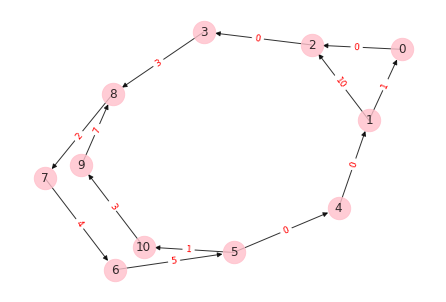

In [14]:
g = Graph()
g.read_file("graph.txt")
g.calculate_graph(draw_mode = True)

C:\Users\surja\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


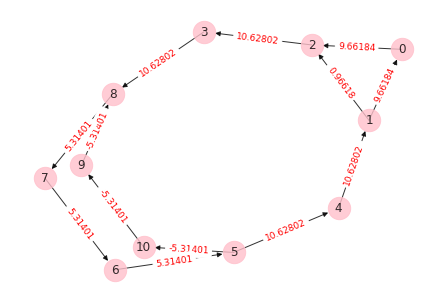

In [15]:
g.kirchoff()

### Info:
W powyższym grafie natężenie zostało wyliczone dobrze (ujemne liczby wskazują że prąd płynie w drugą stronę niż założono).
Podział prądu w węzłach jest prawidłowy i zgodny z prawami Kirchoffa.

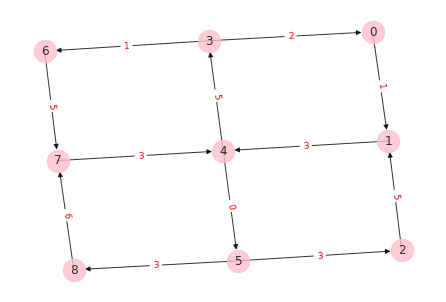

In [16]:
k = Graph()
k.read_file("graph2.txt")
k.calculate_graph(draw_mode = True)

C:\Users\surja\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


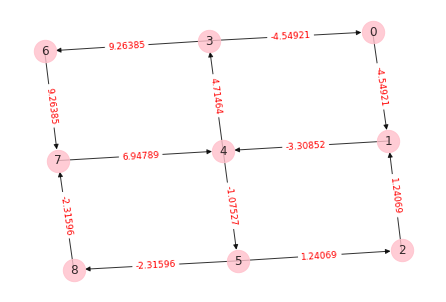

In [17]:
k.kirchoff()

#### Info
Powyższe natężenia również zostały wyliczone dobrze.

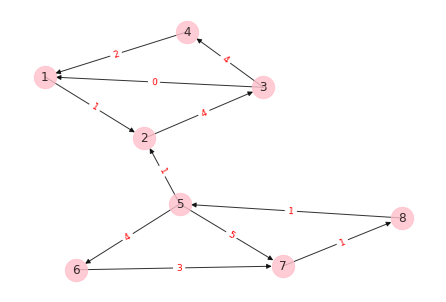

In [258]:
j = Graph()
j.read_file("graph3.txt")
j.calculate_graph(draw_mode = True)

C:\Users\surja\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


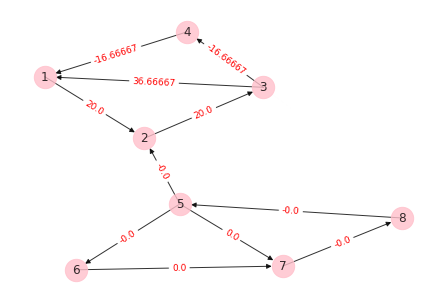

In [259]:
j.kirchoff()

Tutaj cięzko mi jest stwierdzić czy wynik jest dobry, patrząc z perspektywy praw Kirchoffa wszystko wygląda dobrze, lecz zastanawiające jest czemu w dolnej części grafu są same 0.

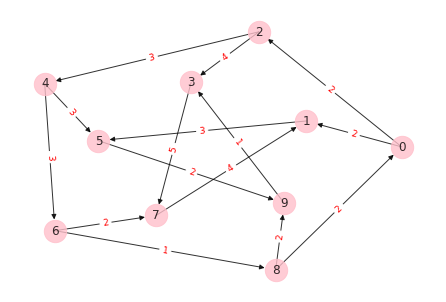

In [252]:
w = Graph()
w.read_file("graph4.txt")
w.calculate_graph(draw_mode = True)

C:\Users\surja\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


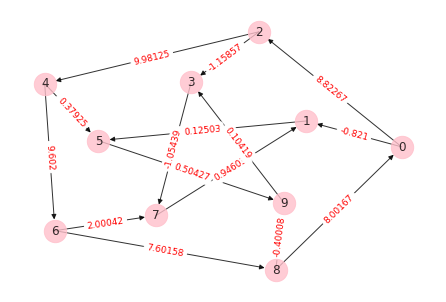

In [253]:
w.kirchoff()

Dla grafu kubicznego wyniki są bardzo dobre (ujemna liczba oznacza że prąd płynie w drugą stronę niż założono)

## Wnioski:
- Zaimplementowana przeze mnie metoda działa (ale wydaje mi się że istnieją przypadki dla których może nie zadziałać)
- Biblioteki pythona takie jak numpy/scipy pozwazają w bardzo szybki sposób rozwiązywać skomplikowane równania matematyczne